In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from graspy.simulations import sbm, rdpg
from graspy.plot import heatmap

from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.mgc.mgc import MGC

from utils import *
from simulations import *

In [2]:
def iid_rdpg(p=0.5, sigma=0, n=10):
    X = np.random.normal(p, sigma, (n,1))
    A = rdpg(X, rescale=False)
    B = rdpg(X, rescale=False)
    return A, B

[]

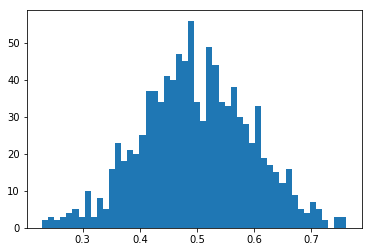

In [3]:
X = np.random.normal(0.5, 0.1, (1000,1))
plt.hist(X, bins=50)
plt.plot()

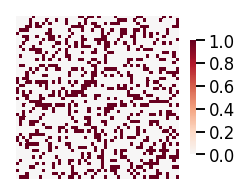

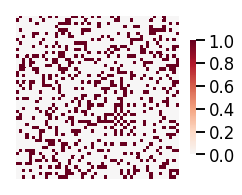

In [30]:
A, B = iid_rdpg(sigma=0, n=50)
heatmap(A, figsize=(4, 3))
heatmap(B, figsize=(4, 3))

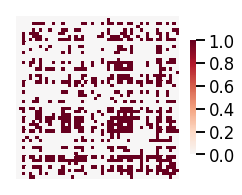

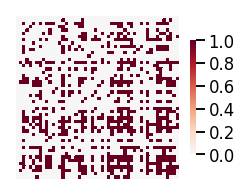

In [5]:
A, B = iid_rdpg(sigma=0.5, n=50)
heatmap(A, figsize=(4, 3))
heatmap(B, figsize=(4, 3))

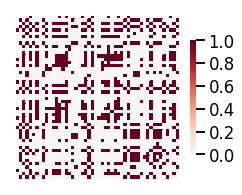

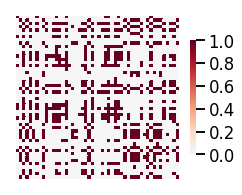

In [29]:
A, B = iid_rdpg(sigma=1, n=50)
heatmap(A, figsize=(4, 3))
heatmap(B, figsize=(4, 3))

In [7]:
sigma_list = np.linspace(0, 1, 11)
pearson_results = []
test = RVCorr(which_test='pearson')
n = 50
for sigma in sigma_list:
    test_power = power(test, iid_rdpg, triu_no_diag, sigma=sigma, n=n)
    pearson_results.append(test_power)

In [8]:
sigma_list = np.linspace(0, 1, 11)
dcorr_results = []
test = DCorr(compute_distance_matrix=identity)
n = 50
for sigma in sigma_list:
    test_power = power(test, iid_rdpg, to_distance_mtx, sigma=sigma, n=n)
    dcorr_results.append(test_power)
    print('finish {}'.format(sigma))

finish 0.0
finish 0.1
finish 0.2
finish 0.30000000000000004
finish 0.4
finish 0.5
finish 0.6000000000000001
finish 0.7000000000000001
finish 0.8
finish 0.9
finish 1.0


In [ ]:
sigma_list = np.linspace(0, 1, 11)
mgc_results = []
test = MGC(compute_distance_matrix=identity)
n = 50
for sigma in sigma_list:
    test_power = power(test, iid_rdpg, to_distance_mtx, sigma=sigma, n=n)
    mgc_results.append(test_power)
    print('finish {}'.format(sigma))

In this simulation setting, the latent positions are perfectly correlated, but each edge is perfectly uncorrelated ($A_{ij}$ and $B_{ij}$ are sampled independently from $Bern(X_iX_j)$).

Text(0, 0.5, 'power')

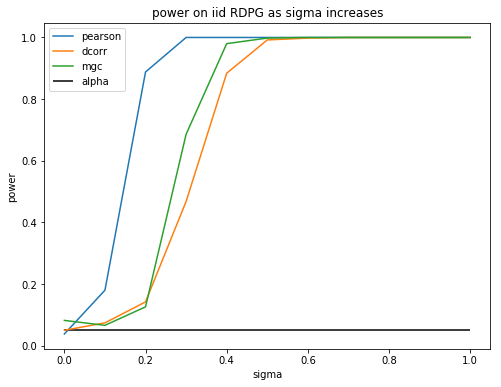

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(sigma_list, pearson_results, label='pearson')
plt.plot(sigma_list, dcorr_results, label='dcorr')
plt.plot(sigma_list, mgc_results, label='mgc')
plt.hlines(y=0.05, xmin=0, xmax=1, label='alpha')
plt.legend()
plt.title('power on iid RDPG as sigma increases')
plt.xlabel('sigma')
plt.ylabel('power')

In [24]:
num_samples = [10, 50, 100, 500]
pearson_results_ER = []
test = RVCorr(which_test='pearson')
for n in num_samples:
    test_power = power(test, rho_ER, triu_no_diag, rho=0, p=0.5, n=n)
    pearson_results_ER.append(test_power)
    print('finish {}'.format(n))

finish 1.0
finish 1.0
finish 1.0
finish 1.0


In [26]:
num_samples = [10, 50, 100, 500]
dcorr_results_ER = []
test = DCorr(compute_distance_matrix=identity)
for n in num_samples:
    test_power = power(test, rho_ER, to_distance_mtx, rho=0, p=0.5, n=n)
    dcorr_results_ER.append(test_power)
    print('finish {}'.format(n))

/Users/jxiong/Documents/Projects/NeuroData/graph_independence_test/env/lib/python3.7/site-packages/graspy/simulations/simulations.py:367: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  triu = np.unravel_index(triu, dims=A.shape)


finish 10
finish 50
finish 100
finish 500


In [25]:
pearson_results_ER

[0.05, 0.048, 0.034, 0.044]

In [27]:
dcorr_results_ER

[0.026, 0.072, 0.056, 0.036]

In [16]:
p_list = np.linspace(0.1, 0.9, 9)
pearson_results = []
test = RVCorr(which_test='pearson')
n = 50
for p in p_list:
    test_power = power(test, rho_ER, triu_no_diag, rho=0, p=p, n=n)
    pearson_results.append(test_power)

In [17]:
pearson_results

[0.048, 0.08, 0.024, 0.064, 0.048, 0.05, 0.036, 0.07, 0.054]

In [18]:
p_list = np.linspace(0.1, 0.9, 9)
dcorr_results = []
test = DCorr(compute_distance_matrix=identity)
n = 50
for p in p_list:
    test_power = power(test, rho_ER, to_distance_mtx, rho=0, p=p, n=n)
    dcorr_results.append(test_power)

In [19]:
dcorr_results

[0.038, 0.064, 0.046, 0.082, 0.058, 0.044, 0.076, 0.048, 0.03]